# MBA FIAP Inteligência Artificial & Machine Learning

## Visão Computacional: Análise de Imagens Médicas

## 1. Introdução

As tecnologias de imagens médicas estão cada vez mais integradas aos sitemas de visão computacional, incluindo as imagens de raio-x.

Modelos de equipamentos modernos geram imagens digitais deste tipo de exame, proporcionando análises mais completas e menos _ad-hoc_, com isso algumas pré-análises podem ser realizadas por aplicações baseadas em inteligência artificial para confirmar ou sugerir diagnósticos ao profissional responsável pelo exame.

No campo dos diagósticos por raios-x, a pnenumonia é uma das enfermidades onde seu uso é um dos mais aplicados para determinar o curso de tratamento.

<p align="center">
    <img src="imagens/NORMAL2-IM-1422-0001.jpeg">
</p>

## 2. Instruções

Este projeto final tem como objetivo explorar os conhecimentos adquiridos nas aulas práticas.

Por meio de uma trilha guiada, iremos constuir um modelo que seja capaz de classificar imagens de raio-x para determinar se a determinada pessoa está com alguma condição que necessita maiores cuidados.

De acordo com as imagens disponíveis para o treinamento e validação, será de critério do grupo selecionar as quantidades ideais ou até mesmo pré-processar as imagens para obter o melhor resultado, nos principais indicadores de performance, como precisão, sensibilidade e pontuação F1.

Este projeto poderá ser feita por grupos de até 4 pessoas.
Caso este projeto seja substitutivo, deverá ser realizado por apenas uma pessoa.

| Nome dos Integrantes     | RM            | Turma |
| :----------------------- | :------------- | :-----: |
| Integrante 1             | RM 12345      | `1IA` |
| Integrante 2             | RM 12345      | `1IA` |
| Integrante 3             | RM 12345      | `1IA` |
| Integrante 4             | RM 12345      | `1IA` |

Por ser um projeto guiado, fique atento quando houver as marcações **Implementação** indica que é necessário realizar alguma implementação em Python no bloco a seguir onde há a inscrição ```##IMPLEMENTAR``` e **Resposta** indica que é esperado uma resposta objetiva relacionado a algum questionamento. 

**Cada grupo pode utilizar nas respostas objetivas quaisquer itens necessários que enriqueçam seu ponto vista, como gráficos, fotos e, até mesmo, trechos de código-fonte.**

Pode-se utilizar quantos blocos forem necessários para realizar determinadas implementações ou utilizá-las para justificar as respostas. Não é obrigatório utilizar somente o bloco indicado.

Ao final não se esqueça de subir os arquivos do projeto nas contas do GitHub de cada membro, ou subir na do representante do grupo e os membros realizarem o fork do projeto.

A avaliação terá mais ênfase nos seguintes tópicos de desenvolvimento do projeto:
 
1. __Pré-Processamento__
2. __Classificação__
3. __Performance__
4. __Conclusões Finais__

## 3.1 Detalhe do problema: a pneunomia

Fonte: [artigo](https://drauziovarella.uol.com.br/doencas-e-sintomas/pneumonia) do Dr. Drauzio Varella.

Pneumonias são infecções que se instalam nos pulmões, órgãos duplos localizados um de cada lado da caixa torácica. Podem acometer a região dos alvéolos pulmonares onde desembocam as ramificações terminais dos brônquios e, às vezes, os interstícios (espaço entre um alvéolo e outro).

Basicamente, pneumonia é provocada pela penetração de um agente infeccioso ou irritante (bactérias, vírus, fungos e por reações alérgicas) no espaço alveolar, onde ocorre a troca gasosa. Esse local deve estar sempre muito limpo, livre de substâncias que possam impedir o contato do ar com o sangue.

Exame clínico, auscultação dos pulmões e radiografias de tórax são recursos essenciais para o diagnóstico de pneumonia.

<p align="center">
    <img src="imagens/pneumonia.jpeg">
</p>

## 3.2 Diagnóstico por raio-x

O exame de raio-x traz diferenças em cada tipo de diagnóstico, sendo considerado os seguintes grupos de análise: **normal** (ou controle) onde não há nenhuma condição de infeção, **bacterial pneumonia** (pneumonia bacteriana) que representa a condição de infecção bacteriana e **viral pneumonia** que indica a condição de infecção vira. 

<p align="center">
<img src="imagens/raiox.png" height="60%" width="60%">
</p>

As imagens de controle não são mais brancas ao centro que é onde fica o coração. Já nas imagens com pneumonia é possível notar regiões brancas ao redor dos pulmões, que é como o exame identifica as secreções responsáveis pela infeçcão.

Quando mais regiões brancas ao redor do pulmão mais severa é a inflamação e menos se observa dos detalhes dos pulmões, ficando um pouco esmaecido diante desta condição.

## 4.1 Problema

Construir um classificador utilizando _transfer learning_ para identificar as seguintes classes: **controle**, **pneumonia bacteriana** e **pneumonia viral**.

Para construir este classificador, utilize o dataset do [Kaggle Chest Ray Pneumonia](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia) e organize os dados de forma a separar em cada uma das classes que já estão definidas no diretório ```raiox```, sendo ```controle``` para as imagens normais (sem inflamação), ```bacteria``` para as imagens de pneumonia bacteriana e ```viral``` para as imagens de pneumonia viral.

Determine a quantidade de imagens a serem treinadas e validadas. Utiliza pelo menos, 100 imagens para cada classe.

Compare os resultados com pelo menos 3 classificadores, obtendo os valores de **precisão (precision)**, **sensibilidade (recall)** e **pontuação F1 (F1 Score)**. No guia abaixo, foi indicado os seguintes modelos: ResNet50, VGG16 e VGG19. 

>Importante: a escolha do número de imagens devem ser o suficiente para alcançar o valor de **precisão** mínima de 70%.

A construção do modelo será utilizada o framework Keras.

## 4.2 Componentes obrigatórios

Este projeto requer a instalação dos seguintes componentes, via ```conda install```:

* Keras
* Tensorflow
* Pillow
* Matplotlib

In [1]:
import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

In [2]:
import os

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import cv2 as cv2

from IPython.display import Image
from keras.utils import plot_model

%matplotlib inline

import keras
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras.applications import VGG16, VGG19
from keras.applications import Xception
# from keras.applications.xception import preprocess_input
from keras.applications.resnet50 import preprocess_input
# from keras.applications.vgg16 import preprocess_input
from keras import Model, layers
from keras.models import load_model, model_from_json

from keras.callbacks import TensorBoard as tb
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

import keras.backend as K

import os
import zipfile
import shutil

import warnings
warnings.filterwarnings('ignore')

Using plaidml.keras.backend backend.


In [3]:
print(keras.__version__)

2.2.4


In [4]:
print(tf.__version__)

1.10.0


## 4.3 Carregando imagens de treinamento e validação

Selecione a melhor divisão entre dados de treinamento e validação. O número deverá ser representado em número fracionário, 5% equivale a 0.05, por exemplo.

In [5]:
## IMPLEMENTE
divisao_treino_validacao = 0.3

In [6]:
dataset_root = "../projeto-final/raiox/"
path_to_zip_file = "../projeto-final/chest-xray-pneumonia.zip"
directory_to_extract_to = "../projeto-final/"

dataset_train = "../projeto-final/raiox/train"
dataset_test = "../projeto-final/raiox/test"
dataset_val = "../projeto-final/raiox/val"

srcDir = "../projeto-final/chest_xray/"
log_path = "../projeto-final/"
save_file = 'cv_trab_final_alt.hdf'

SAVE_AUG_DIR = 0
BS = 16

In [7]:
## Verificando o diretório raiz e descomprimindo o dataset:

if os.path.isdir(srcDir) == True:
    shutil.rmtree(srcDir)

if os.path.isdir(dataset_root) == True:
    shutil.rmtree(dataset_root)

with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

**Pergunta**: Qual o número de imagens que foram selecionadas para cada classe?

**Resposta**:

In [8]:
## Verificando as amostras oferecidas no dataset:
for i in ['test', 'train', 'val']:
    for j in ['NORMAL', 'PNEUMONIA']:
        locals()['list_' + str(i) + '_' + str(j)] = [f for f in os.listdir(os.path.join(srcDir + i + '/' + j + '/'))]
        if len(locals()['list_' + str(i) + '_' + str(j)]) == 0:
            del locals()['list_' + str(i) + '_' + str(j)]
        else:
            print("Quantidade de amostras de {} para categoria {} = {}".format(i,j,len(locals()['list_' + str(i) + '_' + str(j)])))
        
## Listando as amostras de acordo com seu grupo e classe:     
for i in ['test', 'train', 'val']:
    for j in ['NORMAL','PNEUMONIA']:
        for k in ['virus', 'bacteria']:
            locals()['list_' + str(i) + '_' + str(j) + '_' + str(k)] = [f for f in os.listdir(os.path.join(srcDir + i + '/' + j + '/')) if k in f]
            if len(locals()['list_' + str(i) + '_' + str(j) + '_' + str(k)]) == 0:
                del locals()['list_' + str(i) + '_' + str(j) + '_' + str(k)]
            else:
                print("Quantidade de amostras de {} para categoria de {} {} = {}".format(i,j,k,len(locals()['list_' + str(i) + '_' + str(j) + '_' + str(k)])))

Quantidade de amostras de test para categoria NORMAL = 234
Quantidade de amostras de test para categoria PNEUMONIA = 390
Quantidade de amostras de train para categoria NORMAL = 1341
Quantidade de amostras de train para categoria PNEUMONIA = 3875
Quantidade de amostras de val para categoria NORMAL = 8
Quantidade de amostras de val para categoria PNEUMONIA = 8
Quantidade de amostras de test para categoria de PNEUMONIA virus = 148
Quantidade de amostras de test para categoria de PNEUMONIA bacteria = 242
Quantidade de amostras de train para categoria de PNEUMONIA virus = 1345
Quantidade de amostras de train para categoria de PNEUMONIA bacteria = 2530
Quantidade de amostras de val para categoria de PNEUMONIA bacteria = 8


In [9]:
for i in ['test', 'train', 'val']:
    for j in ['NORMAL']:
        if os.path.isdir(dataset_root + i + '/' + j) == False:
            os.makedirs(dataset_root + i + '/' + j )
        for f in locals()['list_' + i + '_' + j]:
            src = srcDir + i + '/' + j + '/' + f
            dst = dataset_root + i + '/' + j
            shutil.move(src, dst) 

In [10]:
for i in ['test', 'train', 'val']:
    for j in ['NORMAL', 'PNEUMONIA']:
        for k in ['virus', 'bacteria']:
            try:
                if len(locals()['list_' + str(i) + '_' + str(j) + '_' + str(k)]) != 0:
                    if os.path.isdir(dataset_root + i + '/' + k + '/') == False:
                        os.makedirs(dataset_root + i + '/' + k + '/')
                    for f in locals()['list_' + str(i) + '_' + str(j) + '_' + str(k)]:
                            src = srcDir + i + '/' + j + '/' + f
                            if 'virus' in f:
                                dst = dataset_root + i + '/' + '/virus/'
                            elif 'bacteria' in f:
                                dst = dataset_root + i + '/' + '/bacteria/'
                            shutil.move(src, dst)
            
                else:
                    None
            except:
                None
                

In [11]:
AUGMENTATION_TRAIN_DIR = "../projeto-final/AUG/train/"
AUGMENTATION_VALID_DIR = "../projeto-final/AUG/val/"
AUGMENTATION_TEST_DIR = "../projeto-final/AUG/test/"

In [12]:
if os.path.isdir(AUGMENTATION_TRAIN_DIR) == True:
    shutil.rmtree(AUGMENTATION_TRAIN_DIR)
if os.path.isdir(AUGMENTATION_VALID_DIR) == True:
    shutil.rmtree(AUGMENTATION_VALID_DIR)
if os.path.isdir(AUGMENTATION_TEST_DIR) == True:
    shutil.rmtree(AUGMENTATION_TEST_DIR)

if SAVE_AUG_DIR==1:
    if os.path.isdir(AUGMENTATION_TRAIN_DIR) == False:
        os.makedirs(AUGMENTATION_TRAIN_DIR)
    if os.path.isdir(AUGMENTATION_VALID_DIR) == False:
            os.makedirs(AUGMENTATION_VALID_DIR)
    if os.path.isdir(AUGMENTATION_TEST_DIR) == False:
            os.makedirs(AUGMENTATION_TEST_DIR)

In [13]:
if os.path.isdir(srcDir) == True:
    shutil.rmtree(srcDir)

In [14]:
# train_datagen = ImageDataGenerator(validation_split=divisao_treino_validacao)

train_datagen = ImageDataGenerator(
#     rescale = 1./255,
#     rotation_range = 10,
    shear_range = 0.2,
    zoom_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
#     vertical_flip = True,
    preprocessing_function=preprocess_input,
    validation_split=divisao_treino_validacao # set validation split
)
    

train_generator = train_datagen.flow_from_directory(
    dataset_train, 
    batch_size=BS,
#     color_mode = "rgb",   # 'grayscale', 'rgb', 'rgba'
    seed=42,
    class_mode="categorical",
#     class_mode="binary",
#     interpolation = "nearest",
#     shuffle=True,
    subset='training',                      # set as training data
    target_size=(150,150),
#     save_to_dir = AUGMENTATION_TRAIN_DIR if SAVE_AUG_DIR==1 else None, 
#     save_prefix = 'train_aug',
#     save_format = "jpeg",
)


validation_generator = train_datagen.flow_from_directory(
    dataset_train,                          # same directory as training data
    batch_size=BS,
#     color_mode = "rgb",   # 'grayscale', 'rgb', 'rgba'
    seed=42,
    class_mode="categorical",
#     class_mode="binary",
    shuffle=True,
#     interpolation = "nearest",
    subset='validation',                    # set as validation data
    target_size=(150,150),
#     save_to_dir = AUGMENTATION_TRAIN_DIR if SAVE_AUG_DIR==1 else None, 
#     save_prefix = 'valid_aug',
#     save_format = "jpeg",
)

test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
    dataset_test,
    batch_size=1,
    color_mode = "rgb",   # 'grayscale', 'rgb', 'rgba'
    seed=42,
    class_mode="categorical",
#     interpolation = "nearest",
    shuffle=False,
    target_size=(150,150),
#     save_to_dir = AUGMENTATION_TRAIN_DIR if SAVE_AUG_DIR==1 else None, 
#     save_prefix = 'train_aug',
#     save_format = "jpeg",
)

Found 3652 images belonging to 3 classes.
Found 1564 images belonging to 3 classes.
Found 624 images belonging to 3 classes.


In [15]:
# train_datagen = ImageDataGenerator(validation_split=divisao_treino_validacao)

# train_generator = train_datagen.flow_from_directory(
#     "raiox/",
#     batch_size=32,
#     class_mode="categorical",
#     color_mode="rgb",
#     target_size=(224,224),
#     subset="training")

In [16]:
# val_generator = train_datagen.flow_from_directory(
#     "raiox/",
#     batch_size=32,
#     class_mode="categorical",
#     color_mode="rgb",
#     target_size=(224,224),
#     subset="validation")

## 4) Visualizing Six Train Image Samples

In [17]:
x_train, y_train = train_generator.next()

In [18]:
x_train.shape

(16, 150, 150, 3)

In [19]:
y_train.shape

(16, 3)

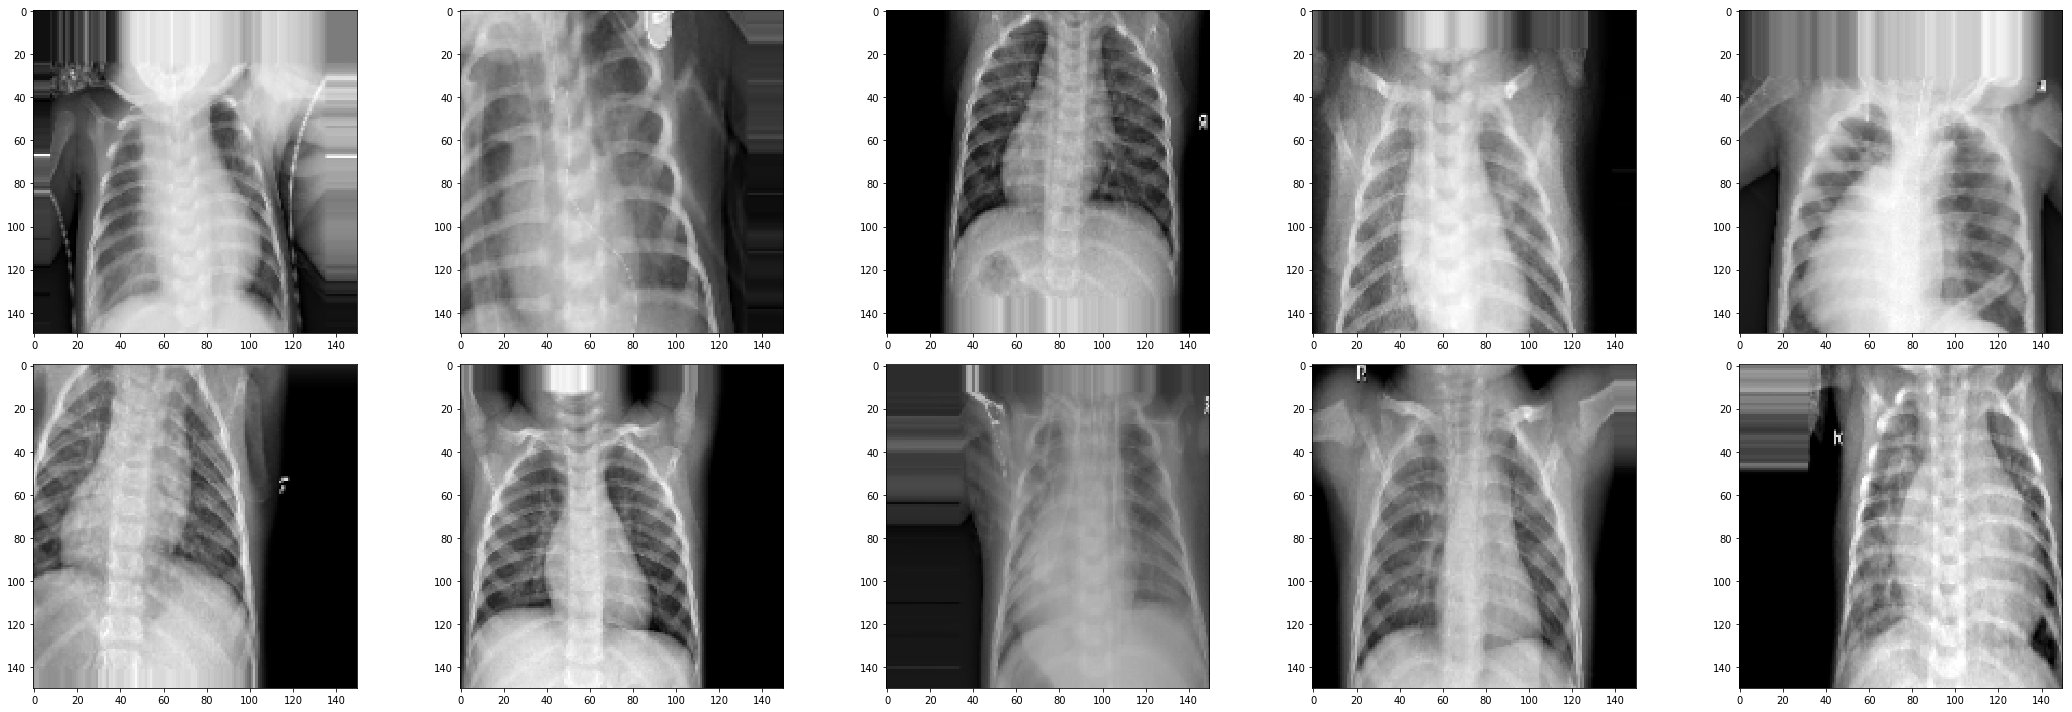

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(30,10))
ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9 = axes.flatten()
axlist = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]

for i in range(0,min(BS,10)):
    image = x_train[i]
    cv2.imshow('{}_{}'.format(224,224), image[:,:,0])
    ax = axlist[i]
    ax.imshow(image[:,:,0], cmap='gray')
    
fig.tight_layout()
plt.show()

## 4.4 Modelos de transfer learning

O Keras já possui classes especializadas para os seguintes modelos de deep-learning treinados com o conjunto de dados [ImageNet](http://www.image-net.org/):
  
* Xception
* VGG16
* VGG19
* ResNet50
* InceptionV3
* InceptionResNetV2
* MobileNet
* DenseNet
* NASNet
* MobileNetV2

Mais detalhes, veja na [documentação do Keras](https://keras.io/applications/).

Para este estudo, vamos utilizar para avaliação as seguintes arquiteturas: RestNet50, VGG15 e VGG19.

## 4.5 Indicadores de desempenho

O Keras não possui os indicadores de desempenho como precisão, sensibilidade e pontuação f1 por padrão, portanto precisamos implementar externamente.

In [21]:
def recall_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

### 4.5.1 Arquitetura ResNet50

**Pergunta**: Explique como é constituída a arquitetura do ResNet50? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*

**Resposta**:

ResNet is a short name for Residual Network. As the name of the network indicates, the new terminology that this network introduces is residual learning.

*What is the need for Residual Learning?*

Deep convolutional neural networks have led to a series of breakthroughs for image classification. Many other visual recognition tasks have also greatly benefited from very deep models. So, over the years there is a trend to go more deeper, to solve more complex tasks and to also increase /improve the classification/recognition accuracy. But, as we go deeper; the training of neural network becomes difficult and also the accuracy starts saturating and then degrades also. Residual Learning tries to solve both these problems.

*What is Residual Learning?*

In general, in a deep convolutional neural network, several layers are stacked and are trained to the task at hand. The network learns several low/mid/high level features at the end of its layers. In residual learning, instead of trying to learn some features, we try to learn some residual. Residual can be simply understood as subtraction of feature learned from input of that layer. ResNet does this using shortcut connections (directly connecting input of nth layer to some (n+x)th layer. It has proved that training this form of networks is easier than training simple deep convolutional neural networks and also the problem of degrading accuracy is resolved.

<!-- ![](https://i.ibb.co/QDX94PK/Screen-Shot-2020-04-07-at-4-46-43-PM.png) -->

<img src="https://i.ibb.co/QDX94PK/Screen-Shot-2020-04-07-at-4-46-43-PM.png" alt="Drawing" style="width:600px; heigth:600px"/>

This is the fundamental concept of ResNet.

ResNet50 expects an input shape (3, 224, 224).

ResNet50 is a 50 layer Residual Network with 25 million parameters. There are other variants like ResNet101 and ResNet152 also.

<!-- ![](https://i.ibb.co/VxfzW0h/ResNet50.png) -->

<img src="https://i.ibb.co/VxfzW0h/ResNet50.png" alt="Drawing" style="width:600px; heigth:600px"/>

http://ethereon.github.io/netscope/#/gist/db945b393d40bfa26006

According to http://cs231n.stanford.edu/reports/2016/pdfs/264_Report.pdf, by adding a simple shortcut
connection can improve the accuracy in the image classification task and make the training process much faster. But
the trade of is that residual networks are more prone to overfitting which is undesirable. If dropout layer and stochastic augmentation is used such overfitting is reduced.

If you want further deeper understanding of ResNets, you have to read this paper. https://arxiv.org/pdf/1512.03385.... 

A técnica de transfer learning consiste de utilizar o mesmo modelo e treiná-lo para outas imagens. Por tal motivo, excluímos a última camada para modelar com as classes que definimos, ou seja, **controle**, **bacteriana** e **viral**.

Informe a quantidade de classes a serem classificadas.

In [22]:
## IMPLEMENTE

qtde_classes = train_generator.num_classes
qtde_classes

3

In [23]:
train_generator.class_indices

{'NORMAL': 0, 'bacteria': 1, 'virus': 2}

In [24]:
# conv_base = ResNet50(include_top=False) ## Original

conv_base = ResNet50(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

INFO:plaidml:Opening device "metal_amd_radeon_pro_5500m.0"


In [25]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

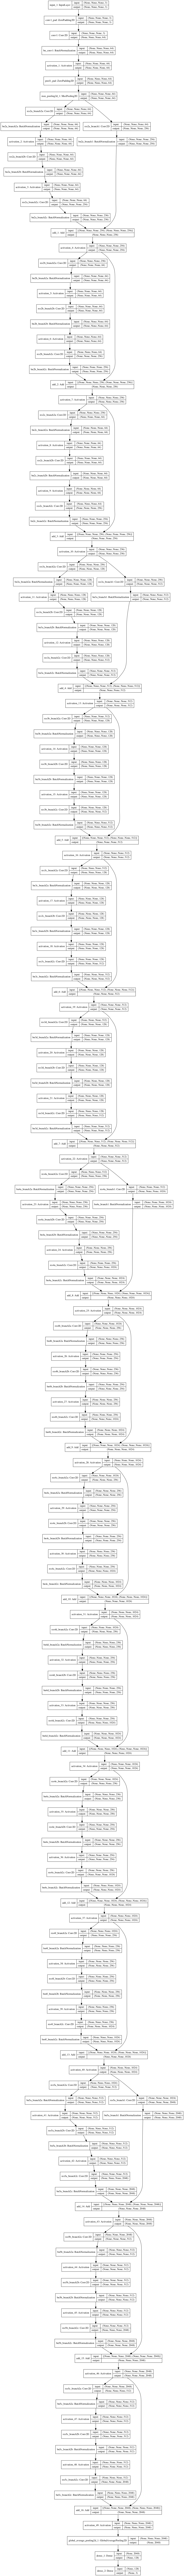

In [26]:
plot_model(model, to_file='resnet-xray.png', show_shapes=True, show_layer_names=True)
Image('resnet-xray.png')

In [27]:
optimizer = keras.optimizers.Adam()
# optimizer = keras.optimizers.SGD()
model.compile(
    loss='categorical_crossentropy', 
#     loss='sparse_categorical_crossentropy',
    optimizer=optimizer, 
    metrics=[precision_score, recall_score, f1_score]
#     metrics=['accuracy']
)

O número de épocas define quantas vezes o modelo irá treinar e validar o erro, assim ajustando os pesos para melhor convergência.
Escolha o número adequado de épocas para alcançarmos pelo menos **70% de precisão de validação**.

In [28]:
## IMPLEMENTE
qtde_epocas = 10

In [29]:
tensorboard = tb(
    log_dir=log_path
    ,write_graph=False #This eats a lot of space. Enable with caution!
#     ,histogram_freq = 1
    ,write_images=True
    ,batch_size = BS
    ,write_grads=True
)

In [30]:
earlystopper = EarlyStopping(
    monitor='loss'
    ,patience=15
    ,verbose=1
)

In [31]:
checkpointer = ModelCheckpoint(
    save_file
    , verbose = 1
    , save_best_only = True
    , monitor=precision_score
#     , monitor='accuracy'
    , mode='min'
)

In [32]:
callbacks = [
    checkpointer
    , earlystopper
    , tensorboard
]

the object created by datagen.flow doesn't know its size, and accordingly you should specify how many times it is expected to yield values, which you can calculate in conjunction with a batch size.

Say you have 100 training points and want to work with a batch size of 30. Then, you would have 4 steps per epoch, calculated in the following way:

In [33]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_TRAIN

228

In [34]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
STEP_SIZE_TEST

624

In [35]:
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
STEP_SIZE_VALID

97

In [ ]:
# history = model.fit_generator(generator=train_generator, 
#                               epochs=qtde_epocas, 
#                               validation_steps=5, 
#                               steps_per_epoch=5, 
#                               validation_data=validation_generator)

In [36]:
# fit model
history = model.fit_generator(
    generator=train_generator
    ,steps_per_epoch=STEP_SIZE_TRAIN
    ,validation_data=validation_generator
    ,validation_steps=STEP_SIZE_VALID
    ,epochs=qtde_epocas
    ,callbacks= callbacks
#     , class_weight = class_weight
)



Epoch 1/10
101/228 [============>.................] - ETA: 34s - loss: 0.7611 - precision_score: 0.7090 - recall_score: 0.6238 - f1_score: 0.6612

INFO:plaidml:Analyzing Ops: 1059 of 1334 operations complete


228/228 [==============================] - 100s 437ms/step - loss: 0.6624 - precision_score: 0.7488 - recall_score: 0.6826 - f1_score: 0.7124 - val_loss: 0.8643 - val_precision_score: 0.6198 - val_recall_score: 0.5838 - val_f1_score: 0.6007
Epoch 2/10
228/228 [==============================] - 106s 463ms/step - loss: 0.5491 - precision_score: 0.8033 - recall_score: 0.7536 - f1_score: 0.7768 - val_loss: 0.8319 - val_precision_score: 0.6491 - val_recall_score: 0.6105 - val_f1_score: 0.6285
Epoch 3/10
228/228 [==============================] - 104s 455ms/step - loss: 0.5304 - precision_score: 0.8012 - recall_score: 0.7588 - f1_score: 0.7787 - val_loss: 1.0060 - val_precision_score: 0.6171 - val_recall_score: 0.5795 - val_f1_score: 0.5970
Epoch 4/10
228/228 [==============================] - 104s 455ms/step - loss: 0.4980 - precision_score: 0.8168 - recall_score: 0.7782 - f1_score: 0.7965 - val_loss: 1.1029 - val_precision_score: 0.5475 - val_recall_score: 0.5181 - val_f1_score: 0.5320
Epo

## 8) Saving the Model

In [37]:
model.save(log_path + save_file)

In [38]:
# from keras.models import load_model
# model = load_model(log_path + save_file)

## 9) Evaluating the Model

In [39]:
scores = model.evaluate_generator(generator=validation_generator, steps=STEP_SIZE_VALID)

In [40]:
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


loss: 79.68%

precision_score: 67.60%


### Learning Curves


#### Plot Training & Validation accuracy values

In [ ]:
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='lower right')
# plt.show()

#### Plot Training & Validation losses values

In [ ]:
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model Entropy Loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['loss', 'val loss'], loc='lower right')
# plt.show()

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

In [ ]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**:

Podemos observar que esse modelo está com overfitting, dado que a precisão, sensibilidade e F1 do conjunto de testes não evoluiram e a perda do modelo do conjunto de teste está aumentando a cada época.

the object created by datagen.flow doesn't know its size, and accordingly you should specify how many times it is expected to yield values, which you can calculate in conjunction with a batch size.

Say you have 100 training points and want to work with a batch size of 30. Then, you would have 4 steps per epoch, calculated in the following way:

**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 

*Estes valores são exibidos durante o treinamento, utilize a última saída, exemplo:*

```
Epoch 10/10 [==============================] - 45s 9s/step - loss: 0.1234 - precision_score: 0.9742 - recall_score: 0.9683 - f1_score: 0.9712 - val_loss: 0.8819 - val_precision_score: 0.6912 - val_recall_score: 0.5649 - val_f1_score: 0.6216```

No caso acima, o valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 69,12%, 56,49% e 62,16%.

In [ ]:
classifier.save(log_path + save_file)

In [ ]:
from keras.models import load_model
model = load_model(log_path + save_file)

**Resposta**:

Precisão de validação: 50%  
Sensibilidade de validação: 50%  
Pontuação de validação: 50% 

## 9) Evaluating the Model

In [ ]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
STEP_SIZE_TEST

In [ ]:
scores = model.evaluate_generator(generator=validation_generator, steps=STEP_SIZE_VALID)

### 4.5.2 Arquitetura VGG16

In [ ]:
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
STEP_SIZE_VALID

### Learning Curves


**Pergunta**: Explique como é constituída a arquitetura do VGG16? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*

#### Plot Training & Validation accuracy values

In [ ]:
# fit model
history = model.fit_generator(
    generator=train_generator
    ,steps_per_epoch=STEP_SIZE_TRAIN
    ,validation_data=validation_generator
    ,validation_steps=STEP_SIZE_VALID
    ,epochs=qtde_epocas
    ,callbacks= callbacks
#     , class_weight = class_weight
)



# history = classifier.fit_generator(training_set,
#                                        #steps_per_epoch = 752,
#                                        #validation_steps = 188,
#                                        epochs = EPOCHS, 
#                                        validation_data = test_set)

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

**Resposta**:

VGG 16 is 16 layer architecture with a pair of convolution layers, poolings layer and at the end fully connected layer. VGG network is the idea of much deeper networks and with much smaller filters. VGGNet increased the number of layers from eight layers in AlexNet. Right now it had models with 16 to 19 layers variant of VGGNet. One key thing is that these models kept very small filters with 3 x 3 conv all the way, which is basically the smallest conv filter size that is looking at a little bit of the neighbouring pixels. And they just kept this very simple structure of 3 x 3 convs with the periodic pooling all the way through the network.
VGG used small filters because of fewer parameters and stack more of them instead of having larger filters. VGG has smaller filters with more depth instead of having large filters. It has ended up having the same effective receptive field as if you only have one 7 x 7 convolutional layers.
VGGNet has conv layers and a pooling layer a couple more conv layers, pooling layer, several more conv layers and so on. VGG architecture has the 16 total number of convolutional and fully connected layers. It has 16 in this case for VGG 16, and then 19 for VGG 19, it’s just a very similar architecture, but with a few more conv layers in there.

<!-- ![](https://i.ibb.co/hKwc7DD/vgg16-mem.png) -->
<img src="https://i.ibb.co/hKwc7DD/vgg16-mem.png" alt="Drawing" style="width:600px; heigth:600px"/>

So this is quite costly computations with 138M total Parameter and each image has a memory of 96MB which is so much large than a regular image. It has just a 7.3 error rate in the ILSVRC challenge.



<!-- ![](https://i.ibb.co/YLP8YPm/vgg-arch.png) -->
<img src="https://i.ibb.co/YLP8YPm/vgg-arch.png" alt="Drawing" style="width:600px; heigth:600px"/>

De acordo com a análise realizada por Alfredo Canziani, Eugenio Culurciello e Adam Paszke ( https://arxiv.org/pdf/1605.07678.pdf ), a arquitetura VGG16 é a que mais demanda em memória na maioria das vezes.

<!-- ![](https://i.ibb.co/Lrrb9m5/VGG-Analysis.png) -->
<img src="https://i.ibb.co/Lrrb9m5/VGG-Analysis.png" alt="Drawing" style="width:600px; heigth:600px"/>

#### Plot Training & Validation losses values

In [ ]:
conv_base = VGG16(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Entropy Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val loss'], loc='lower right')
plt.show()

In [ ]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

In [ ]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [ ]:
history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator)

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

In [ ]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**:

**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 

*Estes valores são exibidos durante o treinamento, utilize a última saída, exemplo:*

```
Epoch 10/10 [==============================] - 45s 9s/step - loss: 0.1234 - precision_score: 0.9742 - recall_score: 0.9683 - f1_score: 0.9712 - val_loss: 0.8819 - val_precision_score: 0.6912 - val_recall_score: 0.5649 - val_f1_score: 0.6216```

No caso acima, o valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 69,12%, 56,49% e 62,16%.

**Resposta**:

### 4.5.3 Arquitetura VGG19

**Pergunta**: Explique como é constituída a arquitetura do VGG19? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*

**Resposta**:

In [ ]:
conv_base = VGG19(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

In [ ]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

In [ ]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [ ]:
history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator)

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

In [ ]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**:

**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 

*Estes valores são exibidos durante o treinamento, utilize a última saída, exemplo:*

```
Epoch 10/10 [==============================] - 45s 9s/step - loss: 0.1234 - precision_score: 0.9742 - recall_score: 0.9683 - f1_score: 0.9712 - val_loss: 0.8819 - val_precision_score: 0.6912 - val_recall_score: 0.5649 - val_f1_score: 0.6216```

No caso acima, o valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 69,12%, 56,49% e 62,16%.

**Resposta**:

## 4.6 Compartivo de arquiteturas

Preencha a tabela abaixo com os valores dos indicadores de performance apresentados.

_O cálculo do F1-Score é dado por 2 * (Precisão * Sensibilidade) / (Precisão + Sensibilidade)._

| Modelo   | Precisão (*Precision*) | Sensibilidade (*Recall*) | F1-Score |
|----------|----------|---------------|----------|
| ResNet50 | XX %     | XX %          | XX %     |
| VGG16    | XX %     | XX %          | XX %     |
| VGG19    | XX %     | XX %          | XX %     |

## 4.7 Conclusões

Analise os resultados da tabela de indicadores do comparativo de arquiteturas e explique os principais motivos pelos quais cada modelo obteve cada resultado.

**Respota**:

## 4.8 Abordagem Extra

Considerando os outros classificadores, escolha outro que ainda não foi utilizado, implemente abaixo. Ao final compare os resultados e explique os resultados.

_Não se esquece de utilizar as importações adequadas para cada modelo.
A forma de implementação deve respeitar as mesmas condições como valor de split e quantidade de imagens para poder comparar os modelos._

In [ ]:
#IMPLEMENTE

### 4.8.1 Conclusões sobre a abordagem extra

Como seu modelo performou em comparação com os demais modelos anteriores? Justifique sua resposta levando em consideração a arquitetura respectiva.

**Resposta**:

### Referências

https://www.quora.com/What-is-the-deep-neural-network-known-as-%E2%80%9CResNet-50%E2%80%9D  
https://towardsdatascience.com/architecture-comparison-of-alexnet-vggnet-resnet-inception-densenet-beb8b116866d